In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [4]:

from PIL import Image

#Cargamos imágenes
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Training')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image=Image.open(filepath)
            new_img = image.resize((40,40))#Redimencionamos todas las imagenes a un mismo tamaño
            new_img.save('s.png','png')#Las guardamos
            image = plt.imread('s.png')#Las leemos pero ahora para convertirlas en arrays
            if len(image.shape)==3:#Las imagenes que son a color las filtramos para convertirlas a blanco y negro
              image=Image.open(filepath)
              image=image.convert('L')#Convertimos la imagen en blanco y negro
              new_img = image.resize((40,40))#Aquí redimencionamos porque abrimos la imagen original no la recortada
              new_img.save('s.png','png')
              image = plt.imread('s.png')
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories),directories)
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirectorios:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Training/
/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Training/Angry 1
/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Training/Fear 3995
/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Training/Happy 4097
/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Training/Neutral 7215
/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Training/Sad 4965
Directorios leidos: 5 ['/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Training/Angry', '/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Training/Fear', '/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Training/Happy', '/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Training/Neutral', '/content/drive/MyDrive/archive.zip (Unzipped Files)/Expr

In [5]:
X=np.array(images)
# save numpy array as npz file
from numpy import asarray
from numpy import savez_compressed
# define data
data = asarray(X)
# save to npy file
savez_compressed('expresiones.npz', data)

In [27]:
# save numpy array as npz file
from numpy import asarray
from numpy import savez_compressed
# define data
data = asarray(y)
# save to npy file
savez_compressed('labelstraining.npz', data)

In [14]:
X.shape

(23481, 40, 40)

In [22]:
expresiones=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    expresiones.append(name[len(name)-1])
    indice=indice+1

0 Angry
1 Fear
2 Happy
3 Neutral
4 Sad


In [15]:
#Creamos las etiquetas
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  23481


In [16]:
#convierto de lista a numpy
y = np.array(labels)
X = np.array(images) 


classes = np.unique(y)
nClasses = len(classes)
print('Total de npumero de salidad: ', nClasses)

print('Salida de cada clase : ', classes)
train_X=X
train_Y=y
print('Training data shape : ', train_X.shape, train_Y.shape)

Total de npumero de salidad:  5
Salida de cada clase :  [0 1 2 3 4]
Training data shape :  (23481, 40, 40) (23481,)


(23481, 40, 40)


Text(0.5, 1.0, 'Ground Truth : 3')

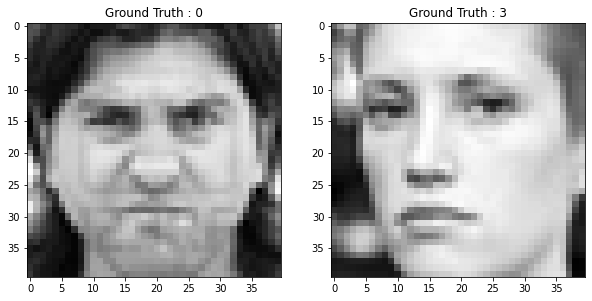

In [21]:

plt.figure(figsize=[10,10])
print(train_X.shape)
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:],cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(train_X[20222,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[20222]))

In [24]:

#Cargamos imágenes
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Testing')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image=Image.open(filepath)
            new_img = image.resize((40,40))
            new_img.save('s.png','png')
            image = plt.imread('s.png')#Cortamos las imágenes
            if len(image.shape)==3:
              image=Image.open(filepath)
              image=image.convert('L')
              new_img = image.resize((40,40))
              new_img.save('s.png','png')
              image = plt.imread('s.png')
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirectorios:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Testing/
/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Testing/Angry 1
/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Testing/Sad 958
/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Testing/Neutral 1247
/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Testing/Happy 1233
/content/drive/MyDrive/archive.zip (Unzipped Files)/Expresiones/dataset/Testing/Fear 1774
Directorios leidos: 5
Imagenes en cada directorio [959, 1247, 1233, 1774, 1023]
suma Total de imagenes en subdirectorios: 6236


In [25]:
 #Creamos las etiquetas
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  6236


In [26]:
#Indicamos la etiquiqueta con el nombre de la flor
diagnostico=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    diagnostico.append(name[len(name)-1])
    indice=indice+1

0 Angry
1 Sad
2 Neutral
3 Happy
4 Fear


In [28]:
#convierto de lista a numpy
y = np.array(labels)
X = np.array(images) 


classes = np.unique(y)
nClasses = len(classes)
print('Total de npumero de salidad: ', nClasses)

print('Salida de cada clase : ', classes)
test_X=X
test_Y=y
print('Training data shape : ', test_X.shape, test_Y.shape)

Total de npumero de salidad:  5
Salida de cada clase :  [0 1 2 3 4]
Training data shape :  (6236, 40, 40) (6236,)


In [29]:
# define data
data = asarray(X)
# save to npy file
savez_compressed('expresiontest.npz', data)
# define data
data = asarray(test_Y)
# save to npy file
savez_compressed('labeltest.npz', data)

Text(0.5, 1.0, 'Ground Truth : 1')

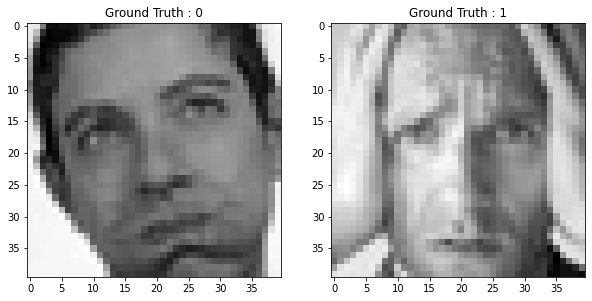

In [32]:
#Graficamos un par de imagenes
plt.figure(figsize=[10,10])

plt.subplot(121)
plt.imshow(test_X[0,:,:],cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

plt.subplot(122)
plt.imshow(test_X[1220,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[1220]))

In [33]:
# Cambiamos las etiquetas a one-hot encondig
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


print('Etiqueta original:', train_Y[0])
print('Etiqueta en one-hot:', train_Y_one_hot[0])

Etiqueta original: 0
Etiqueta en one-hot: [1. 0. 0. 0. 0.]


In [34]:
#Crear los grupos de entrenamiento y validación
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.1, random_state=13)

In [35]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(21132, 40, 40) (2349, 40, 40) (21132, 5) (2349, 5)


In [111]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = .2 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 30 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 30 # cantidad de imágenes que se toman a la vez en memoria

In [112]:
expresion_model = Sequential()
expresion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(40,40,1)))
expresion_model.add(MaxPooling2D((2, 2),padding='same'))


expresion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same'))
expresion_model.add(MaxPooling2D((2, 2),padding='same'))

expresion_model.add(Flatten())
expresion_model.add(Dense(64, activation='relu'))
expresion_model.add(Dropout(0.10))

expresion_model.add(Dense(nClasses, activation='softmax'))

In [113]:
expresion_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),
                     metrics=['accuracy'])

In [117]:
train_X = train_X[:, :, :,0,0]
test_X = test_X[:, :, :,0,0]
valid_X = valid_X[:, :, :,0,0]

In [118]:
# Modificamos la dimensión de las imágenes de (350,350) a  ( 350, 350, 1) para que no haya problema con la lectura de datos
train_X = np.copy(train_X)[...,None]
test_X = np.copy(test_X)[...,None]
valid_X= np.copy(valid_X)[...,None]
print(train_X.shape,test_X.shape,valid_X.shape)

(21132, 40, 40, 1) (6236, 40, 40, 1) (2349, 40, 40, 1)


In [ ]:
expresion_train = expresion_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/30
705/705 [==============================] - 36s 51ms/step - loss: 1.5726 - accuracy: 0.3028 - val_loss: 1.4846 - val_accuracy: 0.3708
Epoch 2/30
705/705 [==============================] - 36s 51ms/step - loss: 1.4533 - accuracy: 0.3836 - val_loss: 1.3570 - val_accuracy: 0.4461
Epoch 3/30
705/705 [==============================] - 36s 51ms/step - loss: 1.3242 - accuracy: 0.4523 - val_loss: 1.2807 - val_accuracy: 0.4819
Epoch 4/30
705/705 [==============================] - 36s 51ms/step - loss: 1.2550 - accuracy: 0.4856 - val_loss: 1.2786 - val_accuracy: 0.4670
Epoch 5/30
705/705 [==============================] - 36s 51ms/step - loss: 1.2087 - accuracy: 0.5146 - val_loss: 1.2256 - val_accuracy: 0.5143
Epoch 6/30
705/705 [==============================] - 36s 51ms/step - loss: 1.1752 - accuracy: 0.5271 - val_loss: 1.2172 - val_accuracy: 0.5236
Epoch 7/30
705/705 [==============================] - 36s 51ms/step - loss: 1.1386 - accuracy: 0.5470 - val_loss: 1.2050 - val_accuracy:

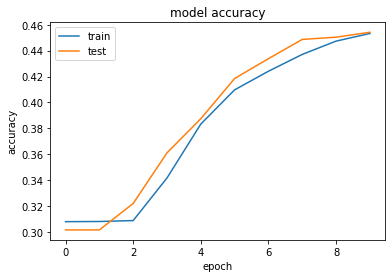

In [108]:
# summarize history for accuracy
plt.plot(expresion_train.history['accuracy'])
plt.plot(expresion_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

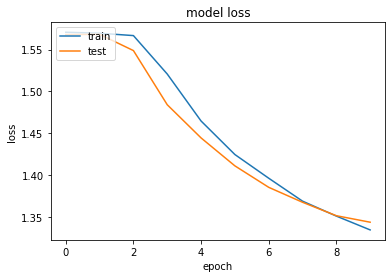

In [109]:
plt.plot(expresion_train.history['loss'])
plt.plot(expresion_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [110]:
test_eval = expresion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

195/195 [==============================] - 3s 15ms/step - loss: 1.9782 - accuracy: 0.1472
El modelo predice el  14.720974862575531 % de los datos
